<a href="https://colab.research.google.com/github/imblessingdavid07/Revolut_Spendiing_Analysis/blob/main/Revolut_Spend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Load the Revolut Excel, prepare dataframes, and generate all requested analyses and visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files
import io


In [12]:
uploaded = files.upload()

Saving revolut_spending_on_debit_cards_dataset.xlsx to revolut_spending_on_debit_cards_dataset (2).xlsx


In [13]:
import os
print(os.path.exists(r"C:\Users\bless\OneDrive\Documents\revolut_spending_on_debit_cards_dataset.xlsx"))


False


In [14]:
print(uploaded.keys())

dict_keys(['revolut_spending_on_debit_cards_dataset (2).xlsx'])


In [15]:
xl = pd.read_excel(io.BytesIO(uploaded['revolut_spending_on_debit_cards_dataset (2).xlsx']))
print('Loaded Excel file: ' + 'revolut_spending_on_debit_cards_dataset (2).xlsx')

Loaded Excel file: revolut_spending_on_debit_cards_dataset (2).xlsx


In [16]:
filename = list(uploaded.keys())[0]
xl = pd.ExcelFile(io.BytesIO(uploaded[filename]))

In [17]:
xl


In [18]:
# Spending by sector (daily)
sector_daily = xl.parse('Spending by sector')
print('Parsed Spending by sector shape: ', (sector_daily.shape))

Parsed Spending by sector shape:  (1251, 8)


In [19]:
# Parsing monthly spends by sector
sector_monthly = xl.parse('Monthly spending by sector')
print('Parsed monthly spending by sector shape: ',(sector_monthly.shape))

Parsed monthly spending by sector shape:  (41, 8)


In [20]:
sector_monthly

,Month,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation
0,2020-01-01,97.170000,103.890000,87.170000,93.940000,90.140000,105.090000,96.310000
1,2020-02-01,99.410000,99.190000,100.100000,98.340000,97.830000,100.320000,100.280000
2,2020-03-01,75.480000,85.230000,48.310000,111.160000,60.480000,85.070000,57.810000
3,2020-04-01,39.530000,43.000000,6.630000,98.100000,8.460000,61.590000,6.990000
4,2020-05-01,48.480000,59.880000,8.910000,102.200000,13.480000,79.370000,10.820000
5,2020-06-01,59.240000,83.290000,14.430000,102.290000,25.310000,93.670000,21.970000
6,2020-07-01,79.300000,118.270000,27.580000,105.630000,56.510000,109.070000,48.250000
7,2020-08-01,95.730000,150.850000,41.450000,115.980000,84.830000,118.200000,65.760000
8,2020-09-01,86.070000,115.400000,35.180000,106.260000,70.990000,116.740000,51.120000
9,2020-10-01,78.640000,91.630000,28.520000,104.090000,54.680000,118.230000,38.140000


In [21]:
# Parsing instore and online spends
instore_online = xl.parse('Instore v online')
print('Parsed instore v online: ' + str(instore_online.shape))

Parsed instore v online: (1251, 2)


In [22]:
# Parsing age spends
age_parse = xl.parse('Spending by age')
print('Parsed age spends: ' + str(age_parse.shape))

Parsed age spends: (1251, 5)


In [23]:
sector_daily.dtypes

,0
Date,datetime64[ns]
Total,float64
Automotive Fuel,float64
Entertainment,float64
Food and Drink,float64
"Pubs, restaurants, and fast food",float64
Retail,float64
Travel and accommodation,float64


In [24]:
# cleaning the daily sector data
d_sector_daily = sector_daily.duplicated().sum()
null_sector_daily = sector_daily.isnull().sum()
sector_daily = sector_daily.sort_values('Date')
daily_cols = [c for c in sector_daily.columns if c != 'Date' ]
for c in daily_cols:
              sector_daily[c] =  pd.to_numeric(sector_daily[c], errors = 'coerce')
print ('no.of duplicates: ',d_sector_daily,' and no.of null values: ', null_sector_daily)
sector_daily = sector_daily.set_index('Date')
sector_daily['Weekday'] = sector_daily.index.day_name()
print(sector_daily.info())

no.of duplicates:  0  and no.of null values:  Date                                0
Total                               0
Automotive Fuel                     0
Entertainment                       0
Food and Drink                      0
Pubs, restaurants, and fast food    0
Retail                              0
Travel and accommodation            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total                             1251 non-null   float64
 1   Automotive Fuel                   1251 non-null   float64
 2   Entertainment                     1251 non-null   float64
 3   Food and Drink                    1251 non-null   float64
 4   Pubs, restaurants, and fast food  1251 non-null   float64
 5   Retail                            1251 non-null   float64
 6   Trav

In [25]:
# cleaning instore v online data and creating instore variable from online variable
instore_online = instore_online.sort_values('Date')
instore_online['Online'] = pd.to_numeric(instore_online['Online'], errors = 'coerce')
instore_online['Instore']= pd.to_numeric(100 - instore_online['Online'], errors ='coerce')
instore_online = instore_online.set_index('Date')
print(instore_online.head())
print('Instor vs Online data description:')
print(instore_online.info())

            Online  Instore
Date                       
2020-01-01      22       78
2020-01-02      22       78
2020-01-03      22       78
2020-01-04      23       77
2020-01-05      24       76
Instor vs Online data description:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Online   1251 non-null   int64
 1   Instore  1251 non-null   int64
dtypes: int64(2)
memory usage: 29.3 KB
None


In [26]:
age_spend = age_parse.copy()
age_spend = age_spend.sort_values('Date')
age_spend = age_spend.set_index('Date')
age_cols = [c for c in age_spend.columns if c not in ['Date']]
for c in age_cols:
  age_spend[c] = pd.to_numeric(age_spend[c], errors='coerce')
print(age_spend.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   1251 non-null   float64
 1   18-34   1251 non-null   float64
 2   35-54   1251 non-null   float64
 3   55+     1251 non-null   float64
dtypes: float64(4)
memory usage: 48.9 KB
None


In [27]:
# merging daily spends on sector with instore vs online spends for easy analysis of instore vs online spends
sector_daily = sector_daily.merge(instore_online[['Online', 'Instore']], left_index = True, right_index = True , how = 'left')
sector_daily = sector_daily.merge(age_spend[['18-34', '35-54', '55+']], left_index = True, right_index = True, how = 'left')

print(sector_daily.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total                             1251 non-null   float64
 1   Automotive Fuel                   1251 non-null   float64
 2   Entertainment                     1251 non-null   float64
 3   Food and Drink                    1251 non-null   float64
 4   Pubs, restaurants, and fast food  1251 non-null   float64
 5   Retail                            1251 non-null   float64
 6   Travel and accommodation          1251 non-null   float64
 7   Weekday                           1251 non-null   object 
 8   Online                            1251 non-null   int64  
 9   Instore                           1251 non-null   int64  
 10  18-34                             1251 non-null   float64
 11  35-54                             1251 non-null   f

In [28]:
left_cols = set(instore_online.columns)
right_cols = set(sector_daily.columns)
overlap = sorted(left_cols & right_cols)
print(overlap)

['Instore', 'Online']


In [29]:
sector_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             41 non-null     datetime64[ns]
 1   Total                             41 non-null     float64       
 2   Automotive Fuel                   41 non-null     float64       
 3   Entertainment                     41 non-null     float64       
 4   Food and Drink                    41 non-null     float64       
 5   Pubs, restaurants, and fast food  41 non-null     float64       
 6   Retail                            41 non-null     float64       
 7   Travel and accommodation          41 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.7 KB


In [30]:
sector_daily

,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Weekday,Online,Instore,18-34,35-54,55+
Date,,,,,,,,,,,,,
2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45,Wednesday,22,78,105.14,126.32,103.74
2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92,Thursday,22,78,108.08,130.03,109.24
2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93,Friday,22,78,108.42,129.62,110.33
2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16,Saturday,23,77,108.00,126.97,109.88
2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29,Sunday,24,76,106.90,122.95,107.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,156.87,172.79,101.93,163.45,129.62,188.29,139.98,Wednesday,40,60,182.30,143.67,113.40
2023-06-01,158.30,173.75,105.50,164.54,131.13,189.68,141.11,Thursday,40,60,183.69,145.36,114.13
2023-06-02,155.37,170.71,105.82,160.50,129.61,184.95,139.42,Friday,40,60,179.47,143.45,112.25


In [31]:
# extracting monthly sector spends from daily spends
sector_monthly = sector_daily.copy()
sector_monthly['MonthName'] = sector_monthly.index.month_name()
sector_monthly['Month'] = sector_monthly.index.month
sector_monthly['MonthYear'] = sector_monthly.index.strftime('%b %y')
sector_monthly

,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Weekday,Online,Instore,18-34,35-54,55+,MonthName,Month,MonthYear
Date,,,,,,,,,,,,,,,,
2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45,Wednesday,22,78,105.14,126.32,103.74,January,1,Jan 20
2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92,Thursday,22,78,108.08,130.03,109.24,January,1,Jan 20
2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93,Friday,22,78,108.42,129.62,110.33,January,1,Jan 20
2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16,Saturday,23,77,108.00,126.97,109.88,January,1,Jan 20
2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29,Sunday,24,76,106.90,122.95,107.43,January,1,Jan 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,156.87,172.79,101.93,163.45,129.62,188.29,139.98,Wednesday,40,60,182.30,143.67,113.40,May,5,May 23
2023-06-01,158.30,173.75,105.50,164.54,131.13,189.68,141.11,Thursday,40,60,183.69,145.36,114.13,June,6,Jun 23
2023-06-02,155.37,170.71,105.82,160.50,129.61,184.95,139.42,Friday,40,60,179.47,143.45,112.25,June,6,Jun 23


In [32]:
# creating a new dataframe for monthly average spends
monthly_avg = sector_monthly.copy()
monthly_avg['MonthYear'] = pd.to_datetime(monthly_avg['MonthYear'], format = '%b %y').dt.to_period('M')
monthly_avg = monthly_avg.groupby('MonthYear').mean(numeric_only = True).reset_index().round(2)
monthly_avg['MonthYear'] = monthly_avg['MonthYear']. dt.strftime('%b %y')
monthly_avg = monthly_avg.set_index('MonthYear')
monthly_avg

,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Online,Instore,18-34,35-54,55+,Month
MonthYear,,,,,,,,,,,,,
Jan 20,97.17,103.89,87.17,93.94,90.14,105.09,96.31,29.97,70.03,98.89,96.21,94.43,1.0
Feb 20,99.41,99.19,100.10,98.34,97.83,100.32,100.28,28.21,71.79,99.16,99.67,99.42,2.0
Mar 20,75.48,85.23,48.31,111.16,60.48,85.07,57.81,34.19,65.81,81.67,70.54,70.40,3.0
Apr 20,39.53,43.00,6.63,98.10,8.46,61.59,6.99,53.57,46.43,43.34,39.51,26.74,4.0
May 20,48.48,59.88,8.91,102.20,13.48,79.37,10.82,53.13,46.87,52.41,49.23,32.85,5.0
Jun 20,59.24,83.29,14.42,102.29,25.31,93.67,21.97,48.27,51.73,64.13,59.94,40.50,6.0
Jul 20,79.30,118.27,27.58,105.63,56.51,109.07,48.25,37.65,62.35,81.65,83.00,59.50,7.0
Aug 20,95.73,150.85,41.45,115.98,84.83,118.20,65.76,30.71,69.29,94.11,104.92,71.75,8.0
Sep 20,86.07,115.40,35.18,106.26,70.99,116.74,51.12,35.40,64.60,95.03,82.89,66.01,9.0


In [33]:
sector_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total                             1251 non-null   float64
 1   Automotive Fuel                   1251 non-null   float64
 2   Entertainment                     1251 non-null   float64
 3   Food and Drink                    1251 non-null   float64
 4   Pubs, restaurants, and fast food  1251 non-null   float64
 5   Retail                            1251 non-null   float64
 6   Travel and accommodation          1251 non-null   float64
 7   Weekday                           1251 non-null   object 
 8   Online                            1251 non-null   int64  
 9   Instore                           1251 non-null   int64  
 10  18-34                             1251 non-null   float64
 11  35-54                             1251 non-null   f

In [34]:
monthly_cols = [c for c in sector_monthly.columns if c not in ['Date','MonthName','MonthYear']]
for c in monthly_cols:
                sector_monthly[c] = pd.to_numeric(sector_monthly[c], errors = 'coerce')
sector_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total                             1251 non-null   float64
 1   Automotive Fuel                   1251 non-null   float64
 2   Entertainment                     1251 non-null   float64
 3   Food and Drink                    1251 non-null   float64
 4   Pubs, restaurants, and fast food  1251 non-null   float64
 5   Retail                            1251 non-null   float64
 6   Travel and accommodation          1251 non-null   float64
 7   Weekday                           0 non-null      float64
 8   Online                            1251 non-null   int64  
 9   Instore                           1251 non-null   int64  
 10  18-34                             1251 non-null   float64
 11  35-54                             1251 non-null   f

In [35]:
instore_online

,Online,Instore
Date,,
2020-01-01,22,78
2020-01-02,22,78
2020-01-03,22,78
2020-01-04,23,77
2020-01-05,24,76
...,...,...
2023-05-31,40,60
2023-06-01,40,60
2023-06-02,40,60


In [36]:
# check for duplicates
instore_online = instore_online.reset_index()
instore_online
instore_online.duplicated().sum()


np.int64(0)

In [37]:
print(type(instore_online))
print(instore_online.head())

<class 'pandas.core.frame.DataFrame'>
        Date  Online  Instore
0 2020-01-01      22       78
1 2020-01-02      22       78
2 2020-01-03      22       78
3 2020-01-04      23       77
4 2020-01-05      24       76


In [38]:
# cleaning instore v online data and creating instore variable from online variable
instore_online = instore_online.sort_values('Date')
instore_online['Online'] = pd.to_numeric(instore_online['Online'], errors = 'coerce')
instore_online['Instore']= pd.to_numeric(100 - instore_online['Online'], errors ='coerce')
instore_online = instore_online.set_index('Date')
print(instore_online.head())
print('Instor vs Online data description:')
print(instore_online.info())


            Online  Instore
Date                       
2020-01-01      22       78
2020-01-02      22       78
2020-01-03      22       78
2020-01-04      23       77
2020-01-05      24       76
Instor vs Online data description:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2020-01-01 to 2023-06-04
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Online   1251 non-null   int64
 1   Instore  1251 non-null   int64
dtypes: int64(2)
memory usage: 29.3 KB
None


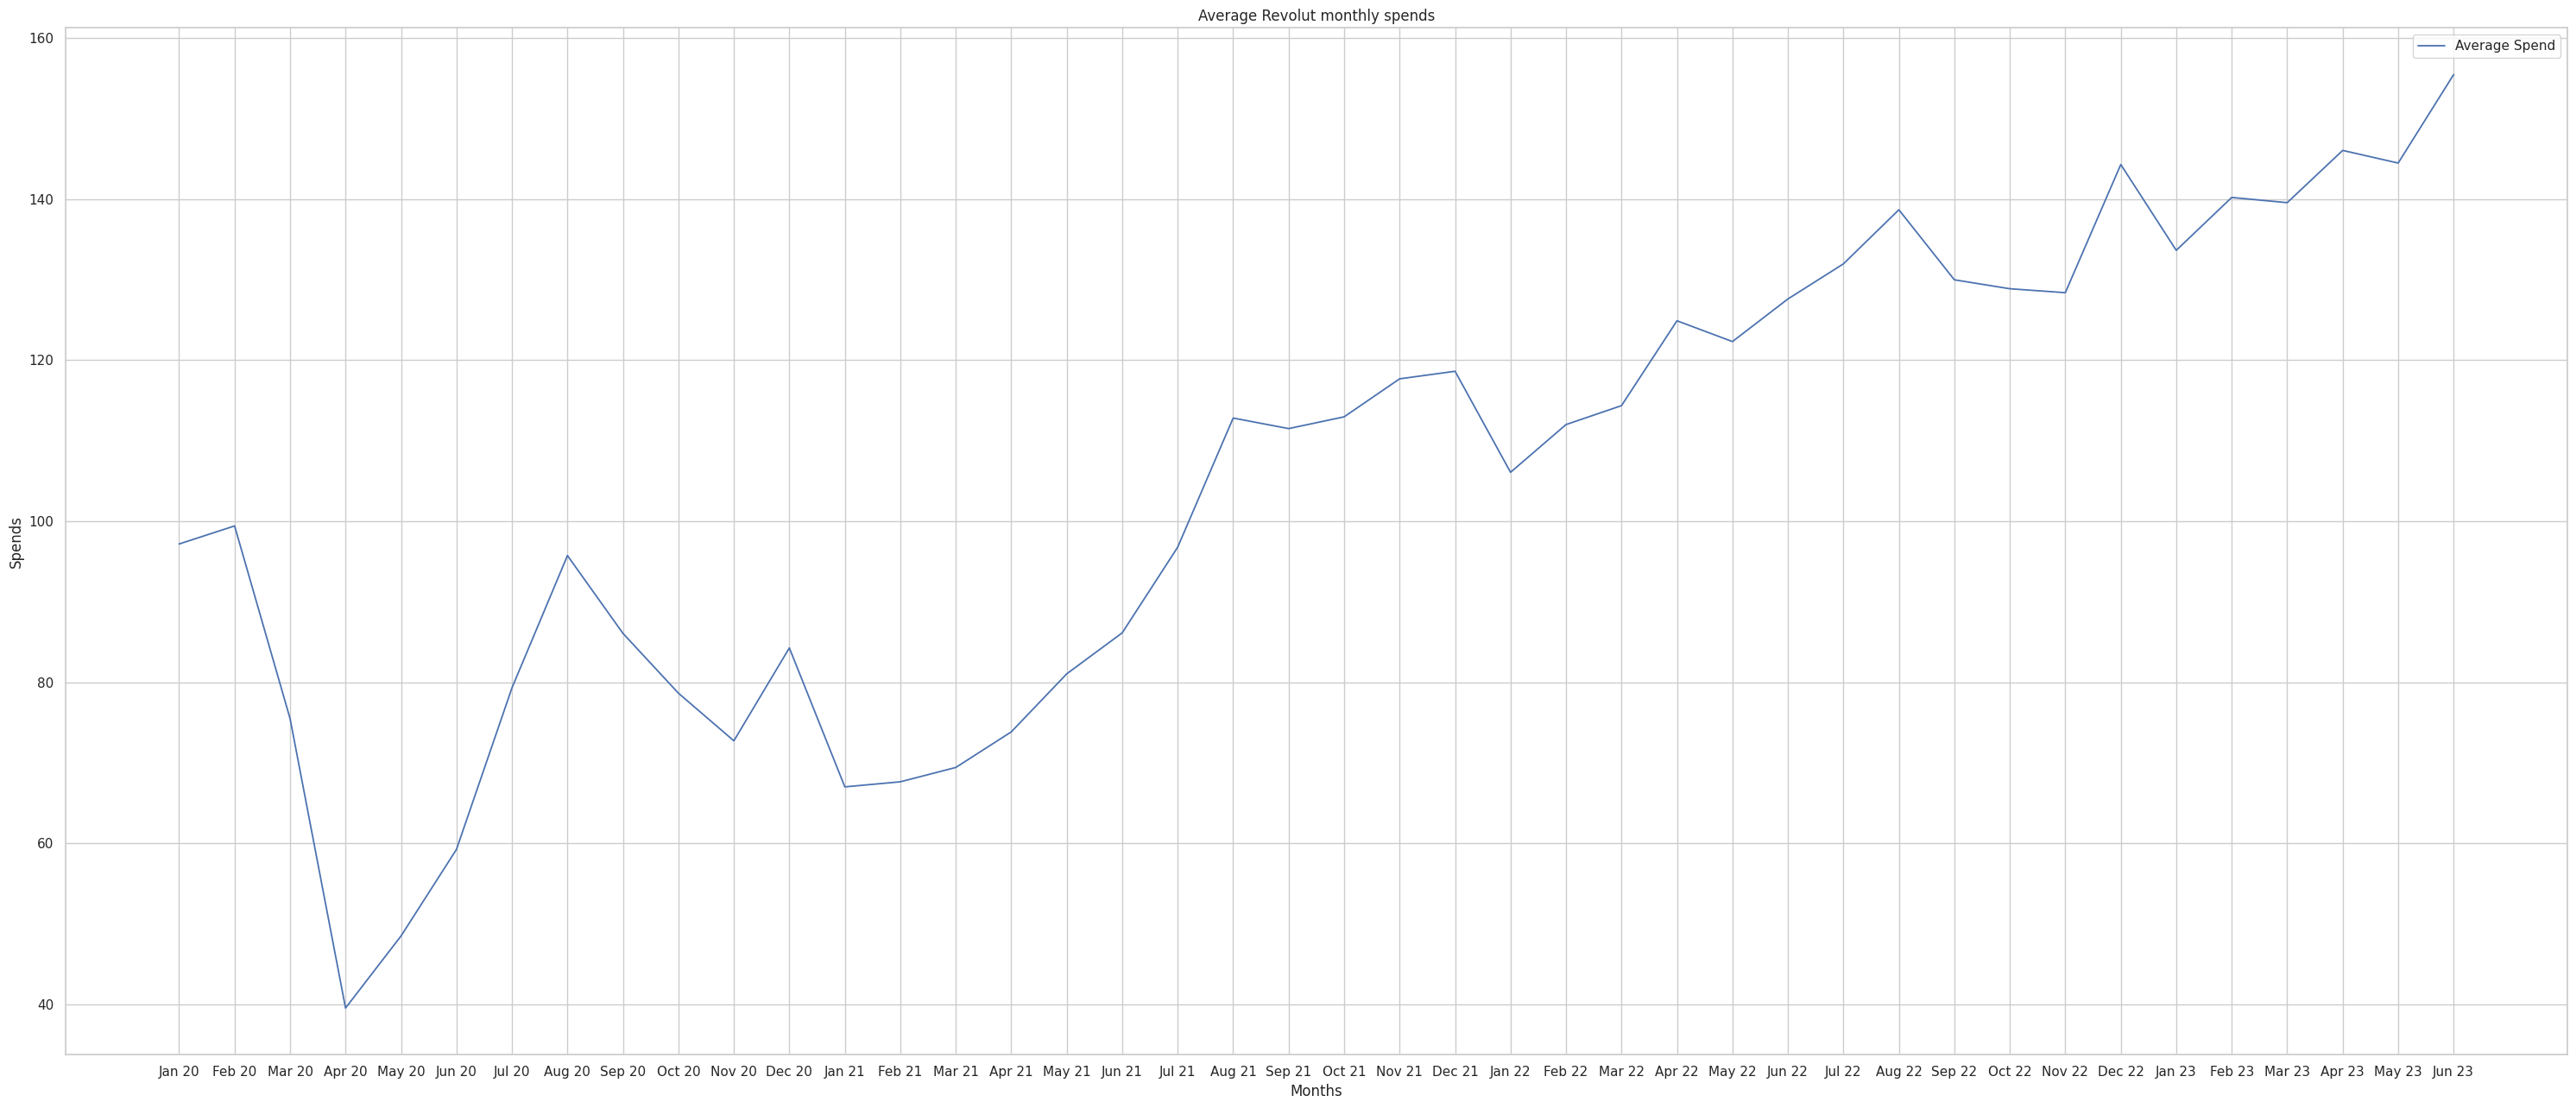

In [39]:
# total revolut spending trends
sns.set(style='whitegrid')
plt.figure(figsize =(30,13))
plt.plot(monthly_avg.index, monthly_avg['Total'], linewidth = 1.3, label = 'Average Spend')
plt.title('Average Revolut monthly spends')
plt.xlabel('Months')
plt.ylabel('Spends')
plt.legend(fontsize = 11)
plt.tight_layout()
plt.show()

In [40]:
print(sector_daily.columns)

Index(['Total', 'Automotive Fuel', 'Entertainment', 'Food and Drink',
       'Pubs, restaurants, and fast food', 'Retail',
       'Travel and accommodation', 'Weekday', 'Online', 'Instore', '18-34',
       '35-54', '55+'],
      dtype='object')


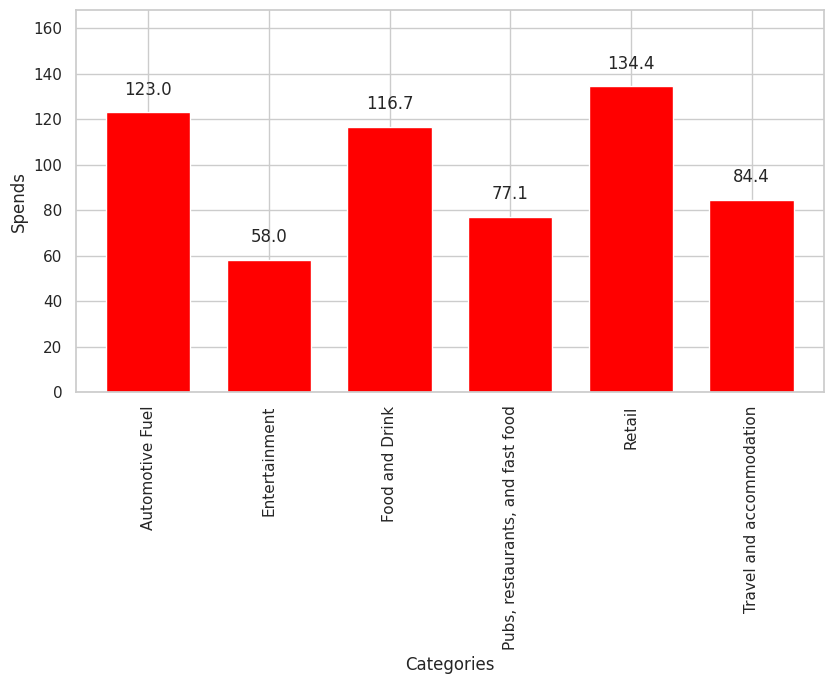

In [41]:
# visualise the avergae spends across categories
cat_col = ['Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants, and fast food', 'Retail', 'Travel and accommodation']
category = sector_daily[cat_col].mean(numeric_only=True)
category.plot(kind = 'bar', width = 0.7, color = 'red', figsize = (8.5,7))
for b in plt.gca().containers:
    plt.gca().bar_label(b, fmt='%.1f', padding = 10)
plt.ylim(0, category.max()*1.25)
plt.xlabel('Categories')
plt.ylabel('Spends')
plt.tight_layout()
plt.show()

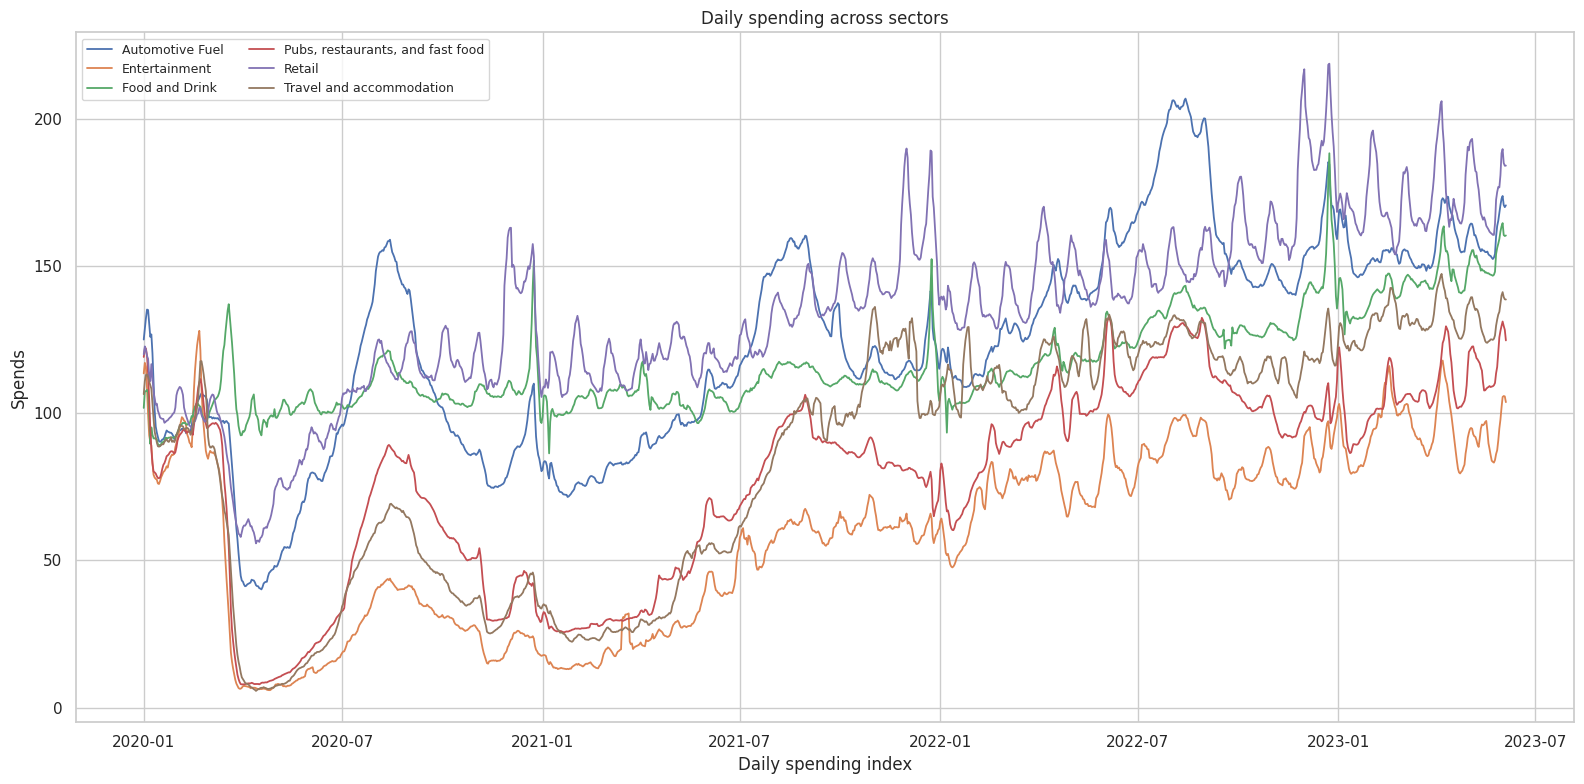

In [42]:
# lijne chart for daily spending by sector
sns.set(style='whitegrid')
plt.figure(figsize = (16,8))
for c in daily_cols:
  if c not in ['Date', 'Total']:
    plt.plot(sector_daily.index, sector_daily[c], label = c, linewidth = 1.3)
plt.title('Daily spending across sectors')
plt.xlabel('Daily spending index')
plt.ylabel('Spends')
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

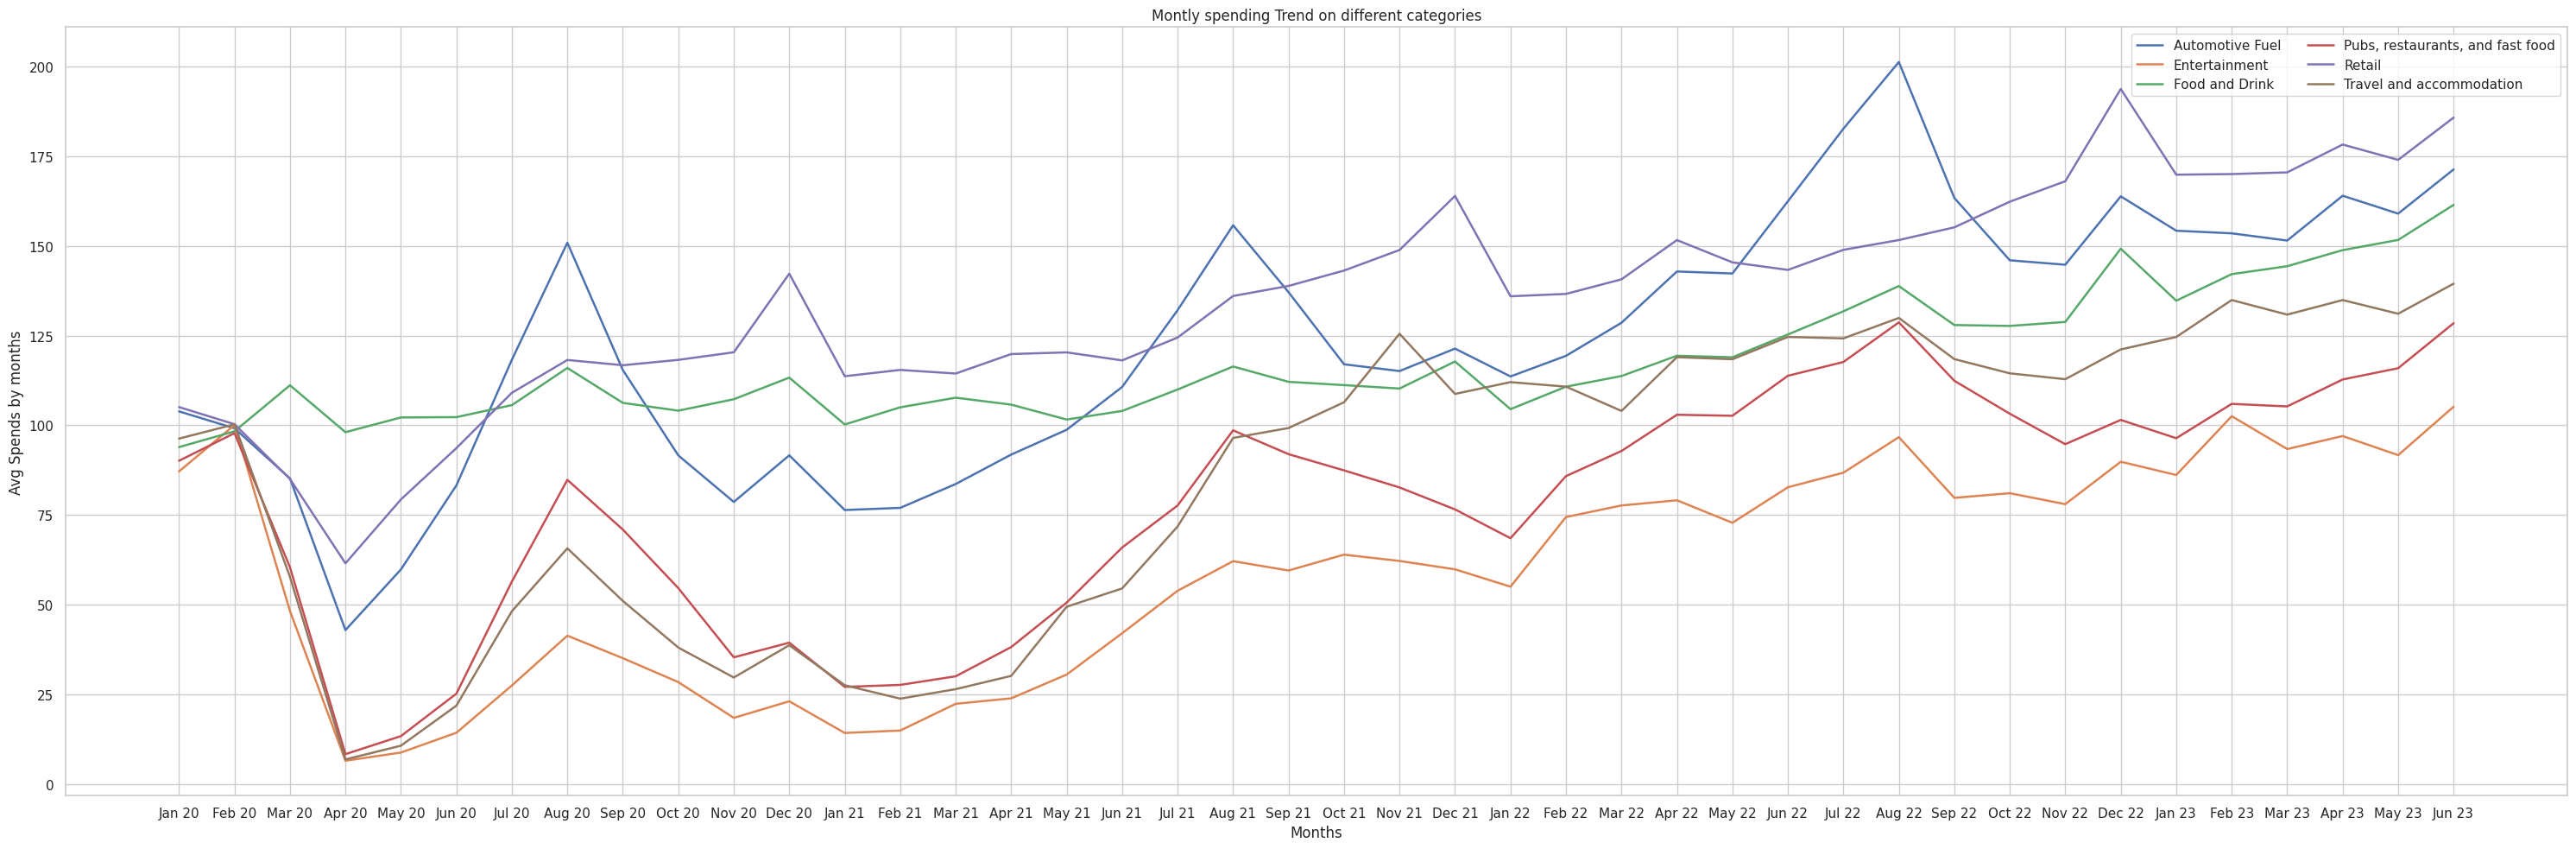

In [43]:
# line chart for monthly spending index  across different years by sector
unwanted_cols = ['Date','Month', 'MonthYear', 'MonthName', 'Total','Online', 'Instore', '18-34', '35-54', '55+', 'Total_y', 'Mon', 'Weekday']
plt.figure(figsize =(30,10))
for c in monthly_cols:
  if c not in unwanted_cols:
    plt.plot(monthly_avg.index, monthly_avg[c], label=c, linewidth = 1.8)
plt.title('Montly spending Trend on different categories')
plt.xlabel('Months')
plt.ylabel('Avg Spends by months')
plt.legend(ncol=2, fontsize=11)
plt.tight_layout()
plt.show()


In [44]:
sector_monthly = sector_monthly.drop(columns=['Weekday'])
sector_monthly

,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Online,Instore,18-34,35-54,55+,MonthName,Month,MonthYear
Date,,,,,,,,,,,,,,,
2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45,22,78,105.14,126.32,103.74,January,1,Jan 20
2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92,22,78,108.08,130.03,109.24,January,1,Jan 20
2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93,22,78,108.42,129.62,110.33,January,1,Jan 20
2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16,23,77,108.00,126.97,109.88,January,1,Jan 20
2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29,24,76,106.90,122.95,107.43,January,1,Jan 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,156.87,172.79,101.93,163.45,129.62,188.29,139.98,40,60,182.30,143.67,113.40,May,5,May 23
2023-06-01,158.30,173.75,105.50,164.54,131.13,189.68,141.11,40,60,183.69,145.36,114.13,June,6,Jun 23
2023-06-02,155.37,170.71,105.82,160.50,129.61,184.95,139.42,40,60,179.47,143.45,112.25,June,6,Jun 23


In [45]:
# lets visualise the average monthly spends
yearly_avg = (
    sector_monthly
    .groupby(sector_monthly.index.month)   # 1,2,3...12
    .mean(numeric_only=True)
    .reset_index().round(2)
    .rename(columns={'Date': 'Mon'})
)

# Convert month number → month name
yearly_avg['Mon'] = pd.to_datetime(yearly_avg['Mon'], format='%m').dt.strftime('%B')
yearly_avg

,Mon,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Online,Instore,18-34,35-54,55+,Month
0,January,100.97,112.03,60.70,108.35,70.58,131.13,90.15,44.55,55.45,115.32,93.80,75.53,1.0
1,February,104.76,112.14,73.28,113.92,79.52,130.31,92.54,42.78,57.22,117.59,98.64,81.14,2.0
2,March,99.70,112.23,60.48,119.22,72.19,127.64,79.80,43.74,56.26,115.69,90.29,75.88,3.0
3,April,96.07,110.41,51.70,118.01,65.61,127.80,72.78,46.52,53.48,109.90,90.81,66.29,4.0
4,May,99.08,114.97,51.03,118.60,70.68,129.75,77.45,45.81,54.19,116.35,90.15,69.40,5.0
5,June,93.73,121.02,48.94,112.70,70.92,121.21,70.14,42.48,57.52,108.42,87.05,65.63,6.0
6,July,102.67,144.31,56.12,115.79,83.95,127.46,81.44,37.55,62.45,113.06,101.08,72.76,7.0
7,August,115.74,169.24,66.78,123.72,104.04,135.27,97.39,33.27,66.73,120.88,121.26,80.72,8.0
8,September,109.18,138.59,58.20,115.44,91.80,136.90,89.61,37.92,62.08,125.91,99.71,83.10,9.0
9,October,106.82,118.19,57.88,114.32,81.79,141.20,86.35,42.29,57.71,125.23,96.86,76.63,10.0


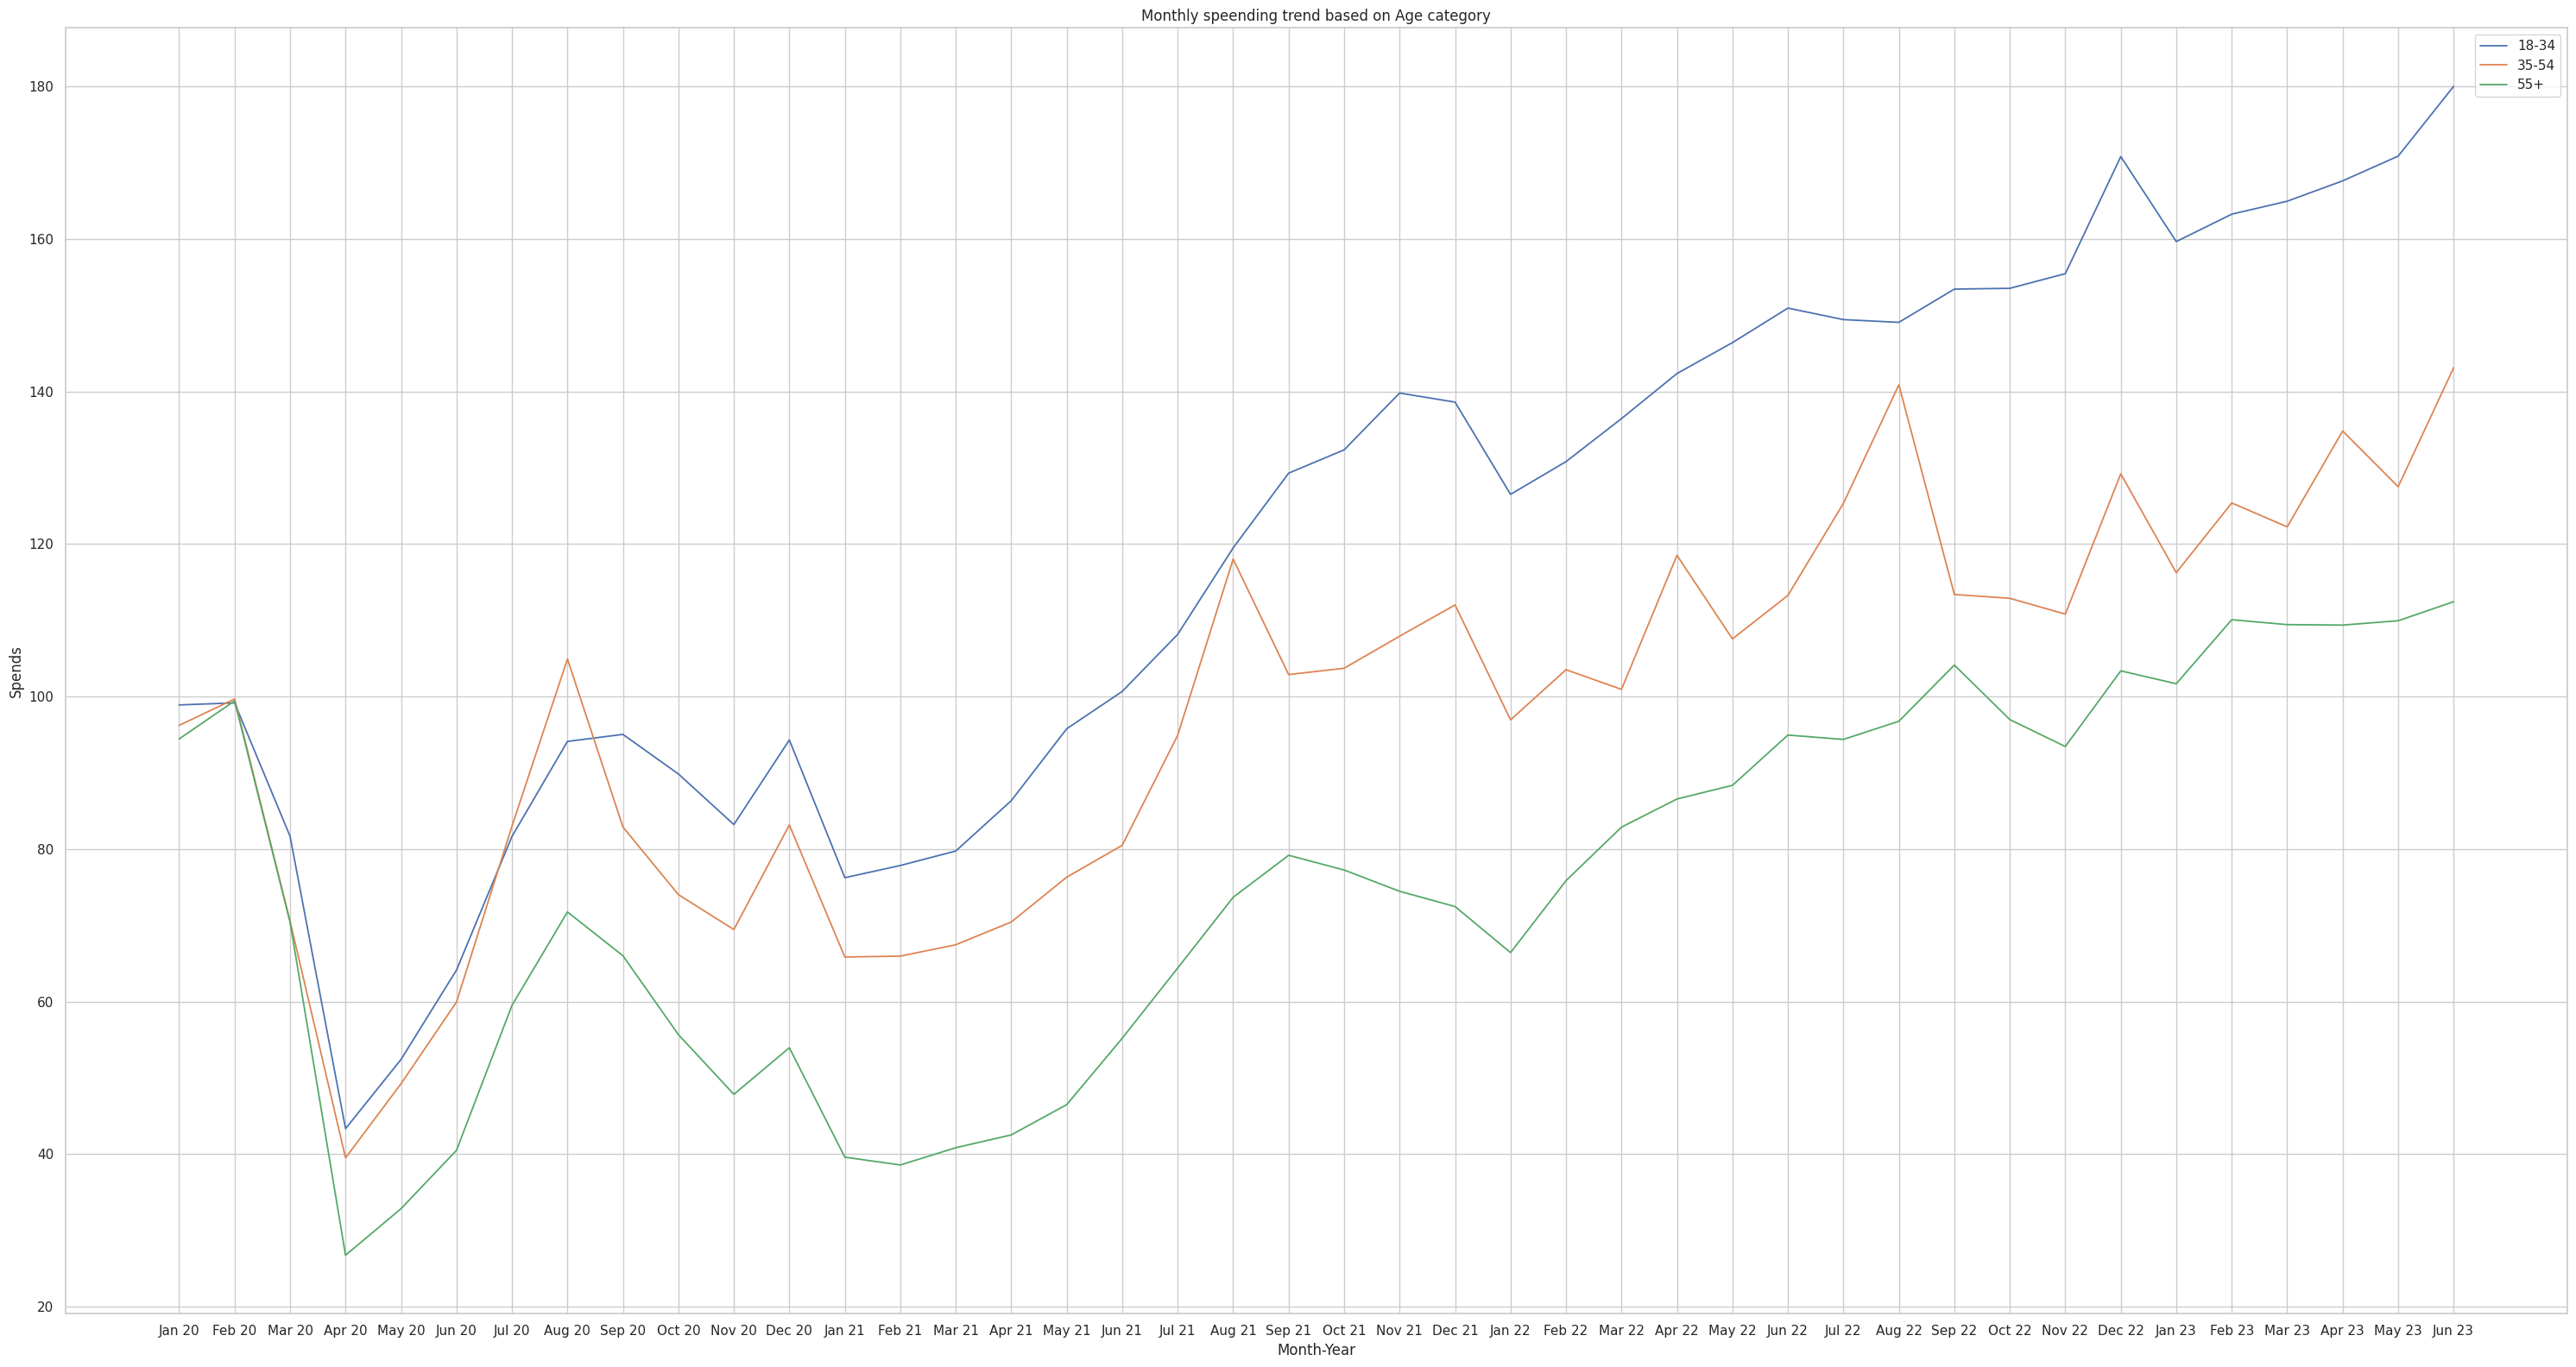

In [46]:
# visualising the average spends for age category throughout each year
age_cols = monthly_avg[['18-34', '35-54', '55+']]
plt.figure(figsize=(30,16))
for col in age_cols:
  plt.plot(monthly_avg.index, monthly_avg[col], label=col, linewidth=1.3)
plt.title('Monthly speending trend based on Age category')
plt.xlabel('Month-Year')
plt.ylabel('Spends')
plt.legend(ncol=1, fontsize = 11)
plt.tight_layout()
plt.show()

In [47]:
yearly_avg

,Mon,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants, and fast food",Retail,Travel and accommodation,Online,Instore,18-34,35-54,55+,Month
0,January,100.97,112.03,60.70,108.35,70.58,131.13,90.15,44.55,55.45,115.32,93.80,75.53,1.0
1,February,104.76,112.14,73.28,113.92,79.52,130.31,92.54,42.78,57.22,117.59,98.64,81.14,2.0
2,March,99.70,112.23,60.48,119.22,72.19,127.64,79.80,43.74,56.26,115.69,90.29,75.88,3.0
3,April,96.07,110.41,51.70,118.01,65.61,127.80,72.78,46.52,53.48,109.90,90.81,66.29,4.0
4,May,99.08,114.97,51.03,118.60,70.68,129.75,77.45,45.81,54.19,116.35,90.15,69.40,5.0
5,June,93.73,121.02,48.94,112.70,70.92,121.21,70.14,42.48,57.52,108.42,87.05,65.63,6.0
6,July,102.67,144.31,56.12,115.79,83.95,127.46,81.44,37.55,62.45,113.06,101.08,72.76,7.0
7,August,115.74,169.24,66.78,123.72,104.04,135.27,97.39,33.27,66.73,120.88,121.26,80.72,8.0
8,September,109.18,138.59,58.20,115.44,91.80,136.90,89.61,37.92,62.08,125.91,99.71,83.10,9.0
9,October,106.82,118.19,57.88,114.32,81.79,141.20,86.35,42.29,57.71,125.23,96.86,76.63,10.0


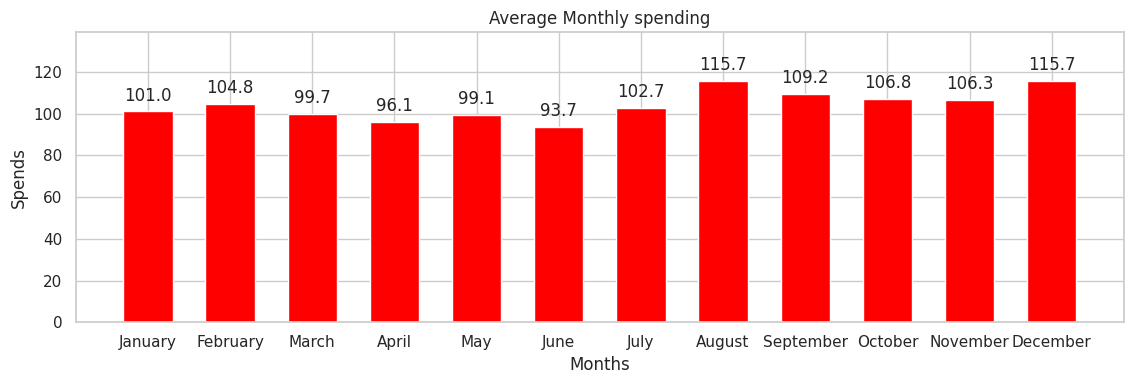

In [48]:
# Average monthly spending index by bar chart
plt.figure(figsize=(11.5,4))
plt.bar(yearly_avg['Mon'], yearly_avg['Total'], width = 0.60, color = 'red')
for a in plt.gca().containers:
    plt.gca().bar_label(a, fmt='%.1f', padding = 5)
plt.ylim(0, yearly_avg['Total'].max()*1.20)
plt.title('Average Monthly spending')
plt.xlabel('Months')
plt.ylabel('Spends')
plt.tight_layout()
plt.show()

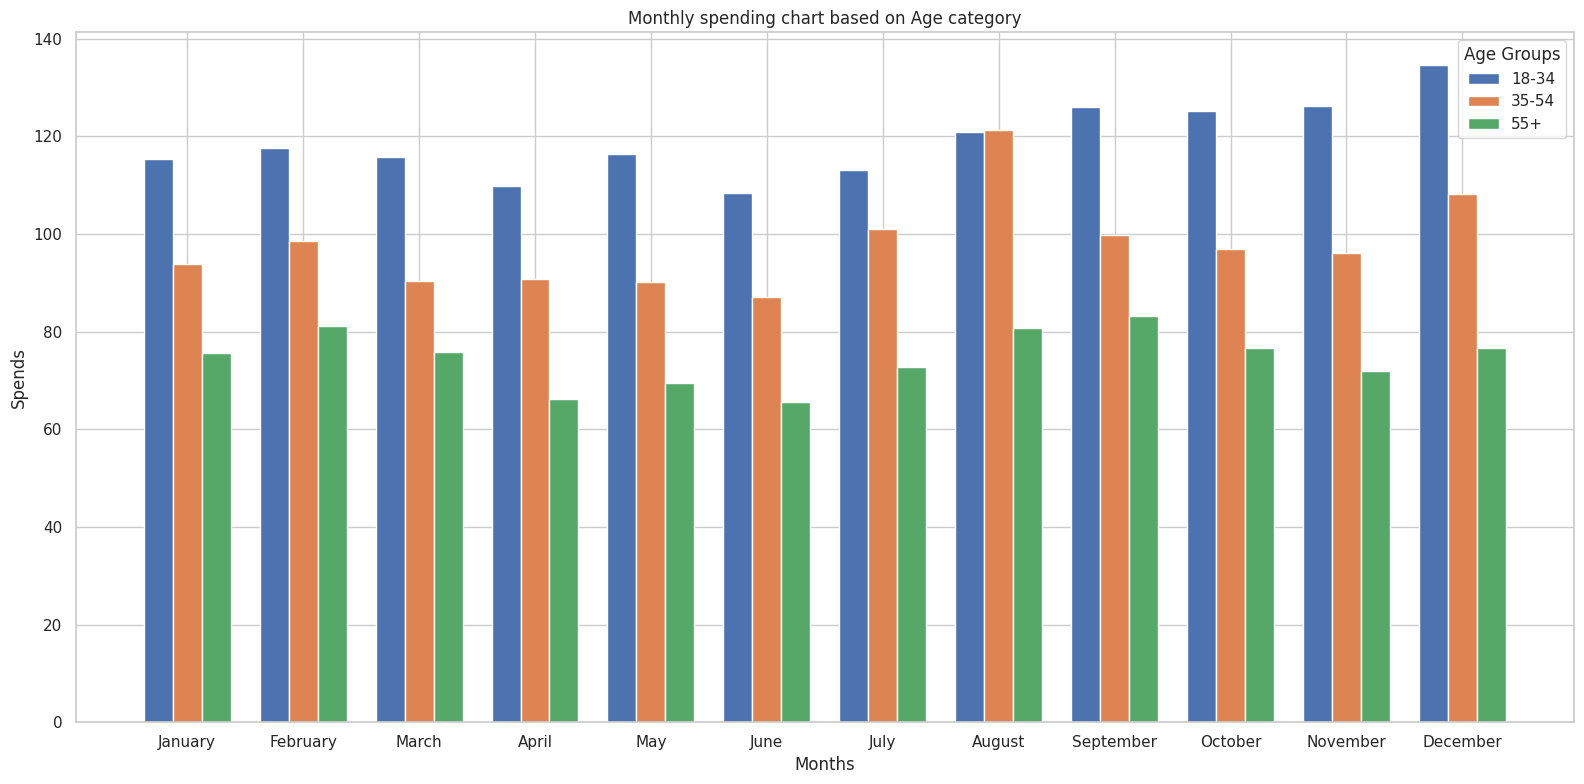

In [49]:
# monthlt spending chart on age category
filter_cols = ['18-34', '35-54', '55+']
x = np.arange(len(yearly_avg['Mon']))
bar_width = 0.25
plt.figure(figsize=(16,8))
for i, col in enumerate(filter_cols):
  plt.bar(x+i*bar_width, yearly_avg[col], width = bar_width, label = col)
plt.xticks(x + bar_width, yearly_avg['Mon'])
plt.title('Monthly spending chart based on Age category')
plt.xlabel('Months')
plt.ylabel('Spends')
plt.legend(title="Age Groups", fontsize=11)
plt.tight_layout()
plt.show()

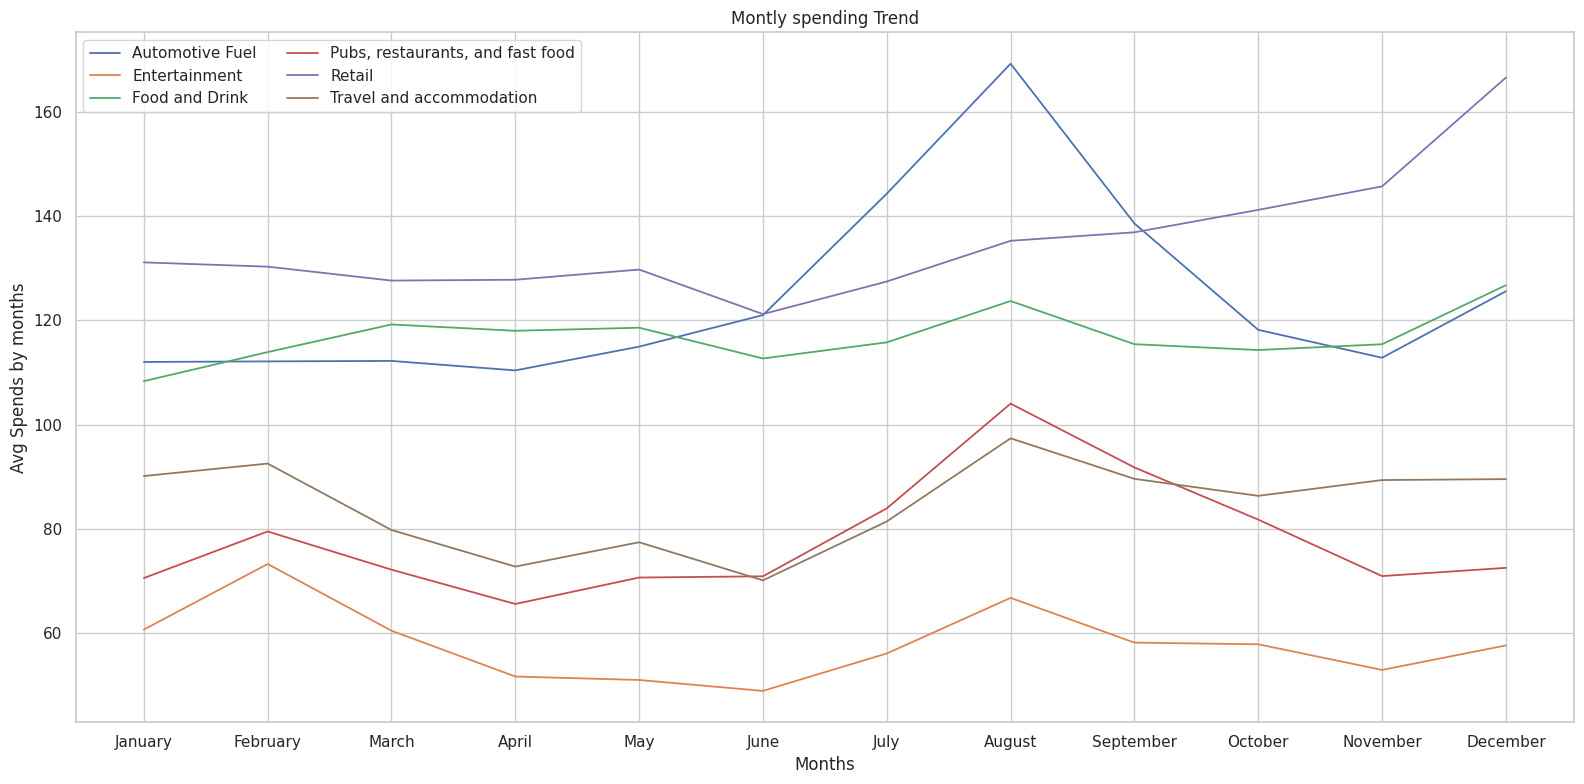

In [50]:
# visualise the spends with respec to months
plt.figure(figsize=(16,8))
for c in yearly_avg.columns:
  if c not in unwanted_cols:
    plt.plot(yearly_avg['Mon'], yearly_avg[c], label=c, linewidth=1.3)
plt.title('Montly spending Trend')
plt.xlabel('Months')
plt.ylabel('Avg Spends by months')
plt.legend(ncol=2, fontsize=11)
plt.tight_layout()
plt.show()

In [51]:
instore_online

,Online,Instore
Date,,
2020-01-01,22,78
2020-01-02,22,78
2020-01-03,22,78
2020-01-04,23,77
2020-01-05,24,76
...,...,...
2023-05-31,40,60
2023-06-01,40,60
2023-06-02,40,60


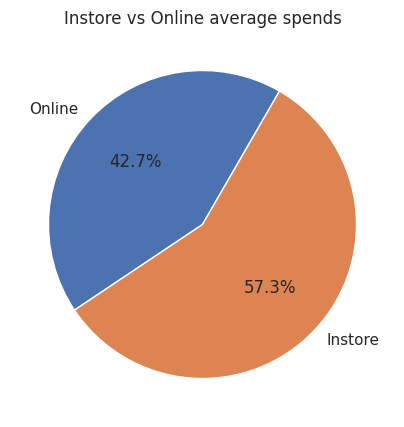

In [52]:
# Average Online vs Instore spends
plt.figure(figsize=(5, 5))
plt.pie(instore_online[['Online', 'Instore']].mean(), labels = instore_online[['Online', 'Instore']].mean().index, autopct='%1.1f%%', startangle=60)
plt.title('Instore vs Online average spends')
plt.show()

In [53]:
if 'index' in instore_online.columns:
  instore_online.drop(columns=['index'], inplace=True)

In [54]:
instore_online

,Online,Instore
Date,,
2020-01-01,22,78
2020-01-02,22,78
2020-01-03,22,78
2020-01-04,23,77
2020-01-05,24,76
...,...,...
2023-05-31,40,60
2023-06-01,40,60
2023-06-02,40,60


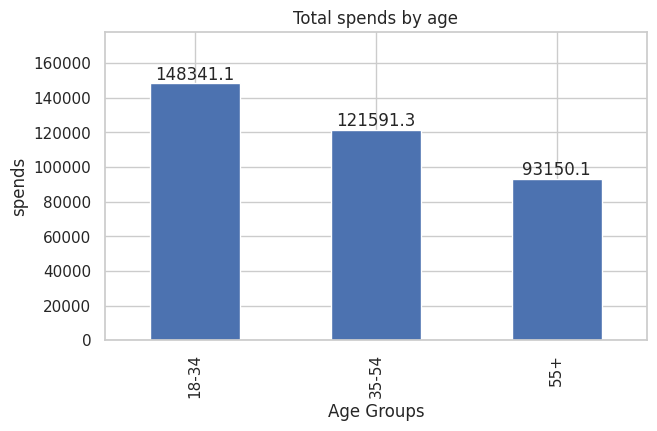

In [55]:
# visualising total spends by different age groups
age_spend_total = age_spend.copy()
age_spend_total = age_spend_total[['18-34', '35-54', '55+']].sum(numeric_only =  True)
age_spend_total.plot(kind='bar', figsize = (7,4), width = 0.5)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f')
plt.ylim(0, age_spend_total.max()*1.20)
plt.title('Total spends by age')
plt.xlabel('Age Groups')
plt.ylabel('spends')
plt.show()

In [56]:
age_spend_total

,0
18-34,148341.12
35-54,121591.28
55+,93150.09


In [57]:
print(instore_online.mean())
print(monthly_avg[['Instore','Online']].mean())

Online     42.716227
Instore    57.283773
dtype: float64
Instore    57.314762
Online     42.685238
dtype: float64


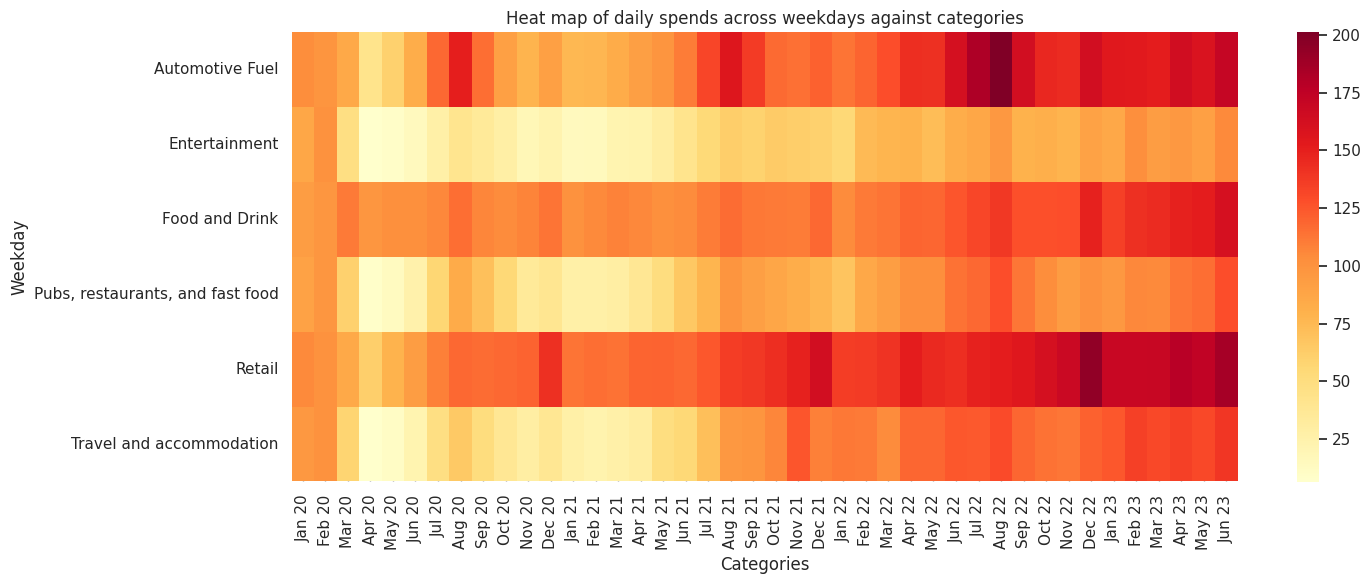

In [58]:
# Heatmap of categories spends
weekday = monthly_avg[cat_col].copy()
plt.figure(figsize=(15,6))
sns.heatmap(weekday.T,cmap = 'YlOrRd',linewidth = 0.0, fmt ='.0f')
plt.title('Heat map of daily spends across weekdays against categories')
plt.xlabel('Categories')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()



In [59]:
# Linear regression testing
import statsmodels.api as sm
yearly_reg = sector_daily.copy()
yearly_reg['Year'] = yearly_reg.index.year
yearly_reg = yearly_reg.groupby('Year').mean(numeric_only =True)
x = yearly_reg.index
y = yearly_reg['Total']
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     91.07
Date:                Tue, 02 Sep 2025   Prob (F-statistic):             0.0108
Time:                        15:43:28   Log-Likelihood:                -10.978
No. Observations:                   4   AIC:                             25.96
Df Residuals:                       2   BIC:                             24.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.581e+04   4812.174     -9.520      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Total   No. Observations:                   42
Model:             ExponentialSmoothing   SSE                           2519.011
Optimized:                         True   AIC                            203.946
Trend:                         Additive   BIC                            231.749
Seasonal:                      Additive   AICC                           233.685
Seasonal Periods:                    12   Date:                 Tue, 02 Sep 2025
Box-Cox:                          False   Time:                         22:50:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

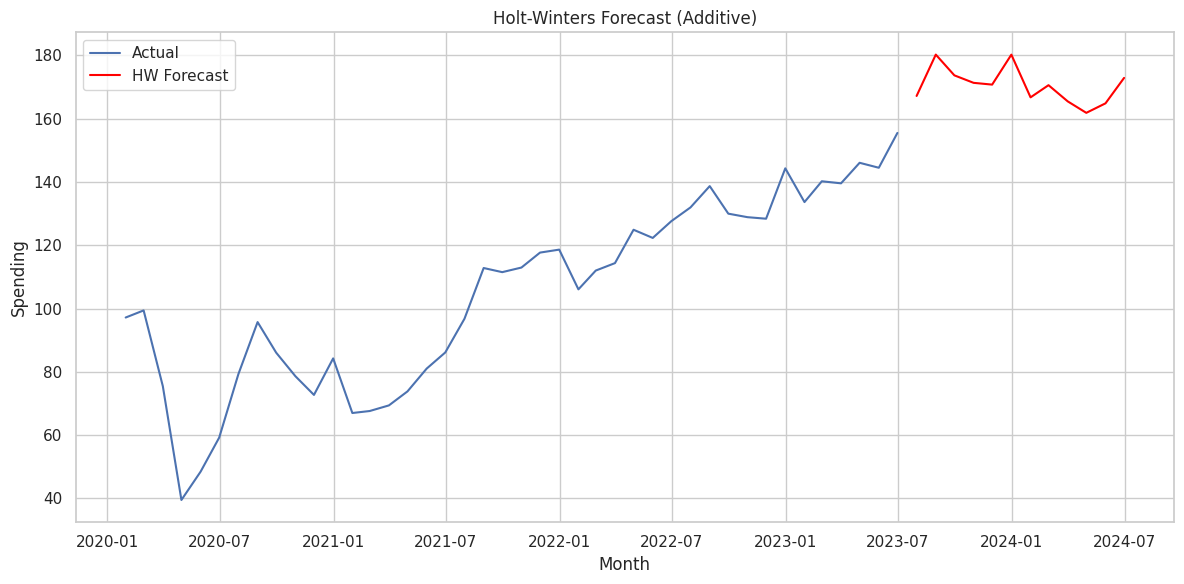

In [138]:
# Holt Winters model for forecating spends
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(ts_monthly, trend='add', seasonal='add', seasonal_periods=12).fit()
pred = hw.forecast(12)
print(hw.summary())
plt.figure(figsize=(12,6))
plt.plot(ts_monthly, label='Actual')
plt.plot(pred.index, pred, label='HW Forecast', color='red')
plt.title('Holt-Winters Forecast (Additive)')
plt.xlabel('Month'); plt.ylabel('Spending')
plt.legend(); plt.tight_layout(); plt.show()

In [161]:
print(pred)

2023-07-31    167.156699
2023-08-31    180.221479
2023-09-30    173.666125
2023-10-31    171.302922
2023-11-30    170.742244
2023-12-31    180.206868
2024-01-31    166.717717
2024-02-29    170.561221
2024-03-31    165.448437
2024-04-30    161.823830
2024-05-31    164.826297
2024-06-30    172.860429
Freq: ME, dtype: float64


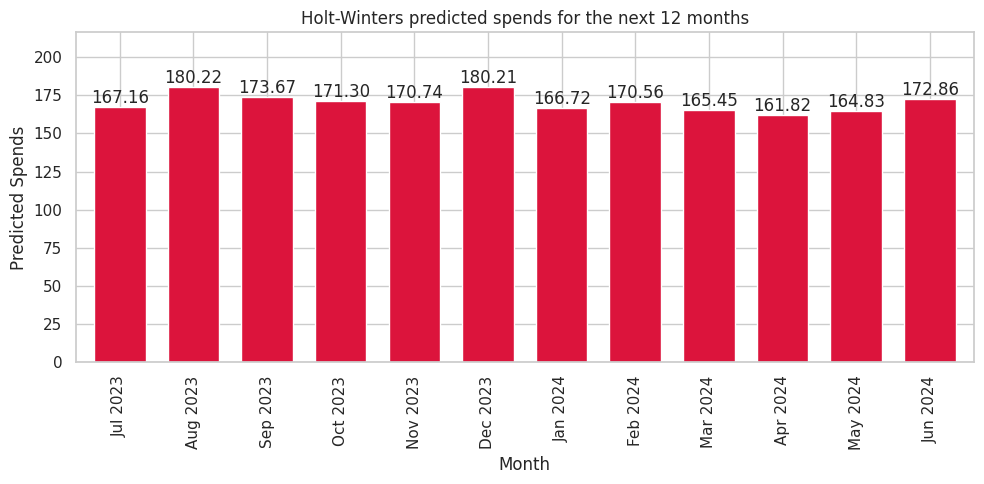

In [160]:
pred_l = pred.copy()
pred_l.index = pred_l.index.strftime('%b %Y')
pred_l.plot(kind = 'bar', width = 0.7, figsize = (10, 5), color ='crimson')
for container in plt.gca().containers:
  plt.gca().bar_label(container, fmt = '%.2f')
plt.ylim(0, pred_l.max()*1.20)
plt.title('Holt-Winters predicted spends for the next 12 months')
plt.xlabel('Month')
plt.ylabel('Predicted Spends')
plt.tight_layout()
plt.show()
plt.show()

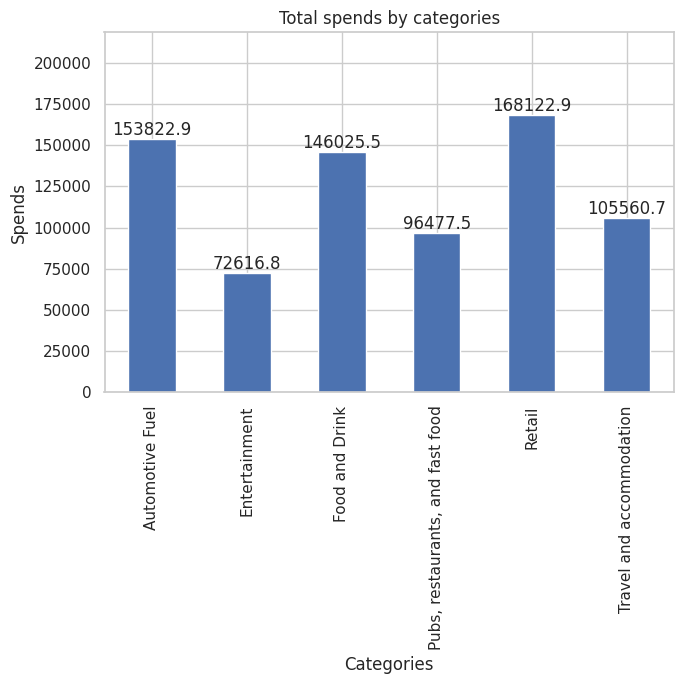

In [69]:
# visualising Total spends across different categories
cat_sum = sector_daily[cat_col].sum()
plt.figure(figsize=(7,5))
cat_sum.plot(kind = 'bar', figsize = (7,7), width = 0.5)
for container in plt.gca().containers:
  plt.gca().bar_label(container, fmt='%.1f')
plt.ylim(0, cat_sum.max()*1.30)

plt.title('Total spends by categories')
plt.xlabel('Categories')
plt.ylabel('Spends')
plt.tight_layout()
plt.show()


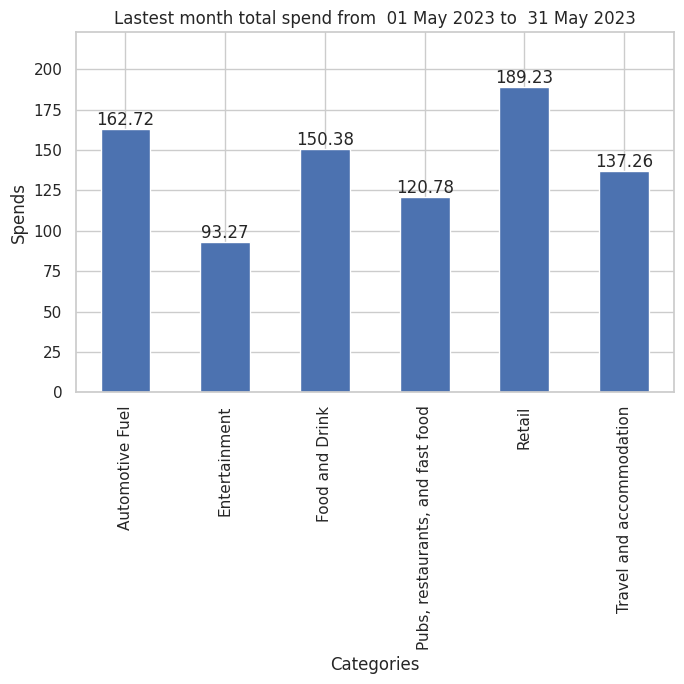

In [109]:
# viasualising last month spends
sector_daily
z = sector_daily[cat_col].copy()
last_date =z.index.max()
if last_date.day >= 15:
  start_date = last_date.replace(day=1)
  start, end = start_date, last_date
else:
  start_date = (last_date - pd.DateOffset(months=1)).replace(day=1)
  end_date = start_date + pd.offsets.MonthEnd(1)
  start, end = start_date, end_date
latest_month = z.loc[(z.index >= start) & (z.index <= start)]
latest_month_spends = latest_month.sum(numeric_only = True, axis =0)
latest_month_spends.plot(kind = 'bar', figsize = (7,7), width =0.5)
for container in plt.gca().containers:
  plt.gca().bar_label(container, fmt ='%.2f')
plt.ylim(0, last_month_spends.max()*0.3)
plt.title(f'Lastest month total spend from {start: %d %b %Y} to {end: %d %b %Y}')
plt.xlabel('Categories')
plt.ylabel('Spends')
plt.tight_layout()
plt.show()